# State-Space Modeling

## Extended Mechanical Oscillator

A mechanical oscillator with two spring-damping-mass series connected subsystems (see Figure below) are examined. 

At both subsystems $ i \in \left\{1,2\right\} $ operate the forces of the springs

$$
    F_{c,i}(t) = c_{i} \left[ y_{i}(t) - y_{i-1}(t) \right] \text{,}
$$

of the attenuators (damping)

$$
    F_{c,i}(t) = d_{i} \left[ \dot{y}_{i}(t) - \dot{y}_{i-1}(t) \right]
$$

and of the mass

$$
    F_{m,i}(t) = m_{i} \ddot{y}_{i}(t) \text{.}
$$

Here, it is assumed that the left boundary is not movable and thus

$$
    y_{0}(t) = \dot{y}_{0}(t) \equiv 0 \text{.}
$$

Two external forces $F_{ex,i}$ are applied at the masses and the resulting sum of forces are

$$
    F_{ex,1}(t) ~=~ F_{m,1}(t) + F_{c,1}(t) + F_{d_1}(t) - F_{c,2}(t) - F_{d,2}(t) \\
    \qquad \qquad \qquad \qquad  \qquad \quad ~=~ m_{1} \ddot{y}_{1}(t) + c_{i} y_{1}(t) + d_{1} \dot{y}_{1}(t) -  c_{2} \left[ y_{2}(t) - y_{1}(t) \right] - d_{2} \left[ \dot{y}_{2}(t) - \dot{y}_{1}(t) \right]  \tag{1}
$$

and

$$
    F_{ex,2}(t) ~=~ F_{m,2}(t) + F_{c,2}(t) + F_{d_2}(t) \\
    \qquad \qquad \qquad \qquad \qquad \quad ~=~ m_{2} \ddot{y}_{2}(t) + c_{2} \left[ y_{2}(t) - y_{1}(t) \right] + d_{2} \left[ \dot{y}_{2}(t) - \dot{y}_{1}(t) \right] \text{.} \tag{2}
$$

The external forces impact a change of positions $y_{i}(t)$ which are measured by a sensor. That means, the positions $y_{i}(t)$ are the outputs of the system.


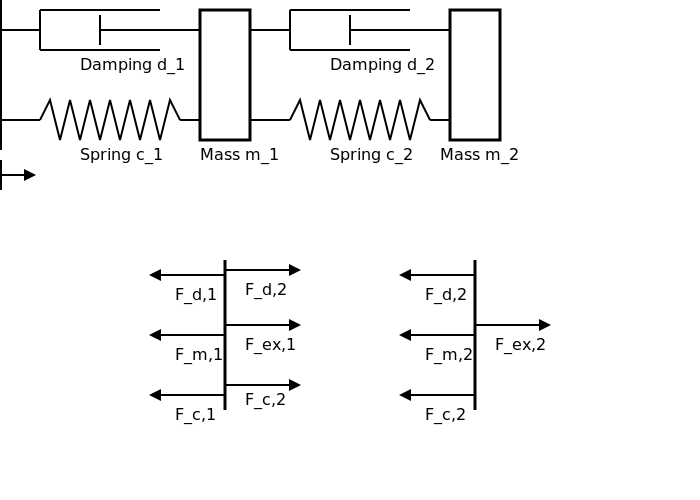

In [60]:
foo = """
<svg height="500" width="700">
    <defs>
    <!-- arrowhead marker definition -->
    <marker id="arrow" viewBox="0 0 10 10" refX="5" refY="5"
        markerWidth="6" markerHeight="6"
        orient="auto-start-reverse">
      <path d="M 0 0 L 10 5 L 0 10 z" />
    </marker>
    </defs>
  <line x1="0" y1="0" x2="0" y2="150" style="stroke:rgb(0,0,0);stroke-width:4" />
  <!-- Damping 1-->
  <line x1="0" y1="30" x2="40" y2="30" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="40" y1="10" x2="40" y2="50" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="40" y1="10" x2="160" y2="10" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="40" y1="50" x2="160" y2="50" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="100" y1="15" x2="100" y2="45" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="100" y1="30" x2="200" y2="30" style="stroke:rgb(0,0,0);stroke-width:2" />
  <text x="80" y="70" fill="black">Damping d_1</text>
  
    <!-- Spring 1-->
  <line x1="0" y1="120" x2="40" y2="120" style="stroke:rgb(0,0,0);stroke-width:2" />
  <polyline points="40,120 50,100 60,140 70,100 80,140 90,100 100,140 110,100 120,140 130,100 140,140 150,100 160,140 170,100 180,120"
  style="fill:none;stroke:black;stroke-width:2" />
  <line x1="180" y1="120" x2="200" y2="120" style="stroke:rgb(0,0,0);stroke-width:2" />
  <text x="80" y="160" fill="black">Spring c_1</text>
  
    <!-- Mass 1-->
  <rect x="200" y="10" width="50" height="130" style="fill:rgb(255,255,255);stroke-width:3;stroke:rgb(0,0,0)" />
  <text x="200" y="160" fill="black">Mass m_1</text>
  
    <!-- Damping 2-->
  <line x1="250" y1="30" x2="290" y2="30" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="290" y1="10" x2="290" y2="50" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="290" y1="10" x2="410" y2="10" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="290" y1="50" x2="410" y2="50" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="350" y1="15" x2="350" y2="45" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="350" y1="30" x2="450" y2="30" style="stroke:rgb(0,0,0);stroke-width:2" />
  <text x="330" y="70" fill="black">Damping d_2</text>

    <!-- Spring 2-->
  <line x1="250" y1="120" x2="290" y2="120" style="stroke:rgb(0,0,0);stroke-width:2" />
  <polyline points="290,120 300,100 310,140 320,100 330,140 340,100 350,140 360,100 370,140 380,100 390,140 400,100 410,140 420,100 430,120"
  style="fill:none;stroke:black;stroke-width:2" />
   
    <!-- Mass 2-->
  <rect x="450" y="10" width="50" height="130" style="fill:rgb(255,255,255);stroke-width:3;stroke:rgb(0,0,0)" />
  <text x="440" y="160" fill="black">Mass m_2</text>

  <line x1="430" y1="120" x2="450" y2="120" style="stroke:rgb(0,0,0);stroke-width:2" />
  <text x="330" y="160" fill="black">Spring c_2</text>

<!-- Positions -->
 <line x1="0" y1="160" x2="0" y2="190" style="stroke:rgb(0,0,0);stroke-width:4" />
 <line x1="0" y1="175" x2="30" y2="175" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
 <text x="45" y="180" fill="black" font-weight="bold" font-size="large">y</text> 
 <text x="2" y="220" fill="black" font-size="large">y_0</text> 
 <text x="215" y="220" fill="black" font-size="large">y_1</text> 
 <text x="465" y="220" fill="black" font-size="large">y_2</text> 

  <!-- Overview Forces 1 -->
    <line x1="225" y1="260" x2="225" y2="410" style="stroke:rgb(0,0,0);stroke-width:3" />
  <line x1="155" y1="275" x2="225" y2="275" style="stroke:rgb(0,0,0);stroke-width:2" marker-start="url(#arrow)" />
  <line x1="155" y1="335" x2="225" y2="335" style="stroke:rgb(0,0,0);stroke-width:2" marker-start="url(#arrow)" />
  <line x1="155" y1="395" x2="225" y2="395" style="stroke:rgb(0,0,0);stroke-width:2" marker-start="url(#arrow)" />
  
  <line x1="225" y1="270" x2="295" y2="270" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
  <line x1="225" y1="325" x2="295" y2="325" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
  <line x1="225" y1="385" x2="295" y2="385" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />  
  <text x="175" y="300" fill="black">F_d,1</text> 
  <text x="175" y="360" fill="black">F_m,1</text>
  <text x="175" y="420" fill="black">F_c,1</text>
  <text x="245" y="295" fill="black">F_d,2</text>
  <text x="245" y="350" fill="black">F_ex,1</text>
  <text x="245" y="405" fill="black">F_c,2</text>

<!-- Overview Forces 2 -->
    <line x1="475" y1="260" x2="475" y2="410" style="stroke:rgb(0,0,0);stroke-width:3" />
  <line x1="405" y1="275" x2="475" y2="275" style="stroke:rgb(0,0,0);stroke-width:2" marker-start="url(#arrow)" />
  <line x1="405" y1="335" x2="475" y2="335" style="stroke:rgb(0,0,0);stroke-width:2" marker-start="url(#arrow)" />
  <line x1="405" y1="395" x2="475" y2="395" style="stroke:rgb(0,0,0);stroke-width:2" marker-start="url(#arrow)" />
  <line x1="475" y1="325" x2="545" y2="325" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
  <text x="425" y="300" fill="black">F_d,2</text> 
  <text x="425" y="360" fill="black">F_m,2</text>
  <text x="425" y="420" fill="black">F_c,2</text>
  <text x="495" y="350" fill="black">F_ex,2</text>
</svg> 
"""
display("image/svg+xml", foo)

## Differential Equation

The differential equation is built as a state-space model. To do so, a n-th order differential equation is transfered to a system of first order differential equations with n states. Here, the two second-order differential equations are reshaped as one system of first order differential equations with four states. 

The external forces are renamed as inputs
$$
    u_{1}(t) ~=~ F_{ex,1}(t) \quad \text{and} \quad  u_{2}(t) ~=~ F_{ex,2}(t) \text{.}
$$

The outputs or measured positions $y_{i}(t)$ are renamed as

$$
x_{1}(t) := y_{1}(t) \qquad \text{and} \qquad x_{2}(t) := y_{2}(t)
$$

and new variables are introduced with

$$
x_{3}(t) ~=~ \dot{y}_{1}(t) ~=~ \dot{x}_{1}(t) \text{,} \\
x_{4}(t) ~=~ \dot{y}_{2}(t) ~=~ \dot{x}_{2}(t) \text{.}
$$


The sum of forces $(1)$ and $(2)$ are rewritten with the new variables as

$$
\dot{x}_{3}(t) ~=~ -\frac{c_{1}}{m_{1}} x_{1}(t) - \frac{d_{1}}{m_{1}} x_{3}(t) +  \frac{c_{2}}{m_{1}} \left[ x_{2}(t) - x_{1}(t) \right] +  \frac{d_{2}}{m_{1}} \left[ x_{4}(t) - x_{3}(t) \right] + \frac{1}{m_{1}} u_{1}(t) 
$$

and 

$$
\dot{x}_{4}(t) ~=~ - \frac{c_{2}}{m_{2}} \left[ x_{2}(t) - x_{1}(t) \right] -  \frac{d_{2}}{m_{2}} \left[ x_{4}(t) - x_{3}(t) \right] + \frac{1}{m_{2}} u_{2}(t) \text{.}
$$

Finally, the variables are reorganized in a matrix-vector notation to gain the state-space model

$$
\begin{pmatrix}
\dot{x}_{1}(t) \\
\dot{x}_{2}(t) \\
\dot{x}_{3}(t) \\
\dot{x}_{4}(t)
\end{pmatrix}
=
\begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\frac{-1}{m_{1}}\left[c_{1} + c_{2}\right] & \frac{c_{2}}{m_{1}} & \frac{-1}{m_{1}}\left[d_{1} + d_{2}\right] & \frac{d_{2}}{m_{1}} \\
\frac{c_{2}}{m_{2}} & -\frac{c_{2}}{m_{2}} & \frac{d_{2}}{m_{2}} & -\frac{d_{2}}{m_{2}}
\end{pmatrix}
\begin{pmatrix}
x_{1}(t) \\
x_{2}(t) \\
x_{3}(t) \\
x_{4}(t)
\end{pmatrix}
+
\begin{pmatrix}
0 & 0 \\
0 & 0 \\
\frac{1}{m_{1}} & 0 \\
0 &\frac{1}{m_{2}}
\end{pmatrix}
\begin{pmatrix}
u_{1}(t) \\
u_{2}(t)
\end{pmatrix}
$$

with states $x_{i}$ and output

$$
\begin{pmatrix}
y_{1}(t) \\
y_{2}(t)
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
x_{1}(t) \\
x_{2}(t) \\
x_{3}(t) \\
x_{4}(t)
\end{pmatrix}
\text{.}
$$

Linear time-invariant (LTI) systems are noted in the standard form as

$$
\dot{x}(t) = A ~ x(t) + B ~ u(t) \\
~y(t) = C ~ x(t) + D ~ u(t)
$$

in which the matrices correspond here to 

$$
A = 
\begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\frac{-1}{m_{1}}\left[c_{1} + c_{2}\right] & \frac{c_{2}}{m_{1}} & \frac{-1}{m_{1}}\left[d_{1} + d_{2}\right] & \frac{d_{2}}{m_{1}} \\
\frac{c_{2}}{m_{2}} & -\frac{c_{2}}{m_{2}} & \frac{d_{2}}{m_{2}} & -\frac{d_{2}}{m_{2}}
\end{pmatrix} 
\qquad \text{,} \qquad
B = 
\begin{pmatrix}
0 & 0 \\
0 & 0 \\
\frac{1}{m_{1}} & 0 \\
0 &\frac{1}{m_{2}}
\end{pmatrix}
$$
and
$$
C = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 
\end{pmatrix}
\qquad \text{,} \qquad
D = 0_{2 \times 2}
\text{.}
$$

## Stability

The system without control 

$$
    \dot{x}(t) = A x(t)
$$

is stable if **all** Eigenvalues $\lambda_{i}$ of A are smaller than zero. The Eigenvalues are found by calculating

$$
 \lambda ~ x(t) = A ~ x(t) \quad \Rightarrow \quad (\lambda I - A) ~ x(t) = 0
$$

and solving the determinant

$$
 \det(\lambda I - A) = 0 \text{.}
$$

## Simulation

The mechanical oscillator with two masses is simulated next. Firstly, the physical constants for mass, damping and spring, and the matrices of the dynamical system have to be specified.

In [1]:
using LinearAlgebra, DifferentialEquations, Plots;

# Defining physical constants
const d₁ = 0.5; # Damping
const d₂ = 0.5;
const c₁ = 0.1; # Spring constant
const c₂ = 0.1;
const m₁ = 1.0; # Mass
const m₂ = 2.0;

# System matrices
A = [0 0 1 0; 0 0 0 1; (-1/m₁)*(c₁ + c₂) c₂/m₁ (-1/m₁)*(d₁ + d₂) d₂/m₁; c₂/m₂ -c₂/m₂ d₂/m₂ -d₂/m₂]
B = [0 0; 0 0; 1/m₁ 0; 0 1/m₂];
C = [1 0 0 0; 0 1 0 0];

println(" A = ", A, "\n B = ", B,"\n C = ", C)

 A = [0.0 0.0 1.0 0.0; 0.0 0.0 0.0 1.0; -0.2 0.1 -1.0 0.5; 0.05 -0.05 0.25 -0.25]
 B = [0.0 0.0; 0.0 0.0; 1.0 0.0; 0.0 0.5]
 C = [1 0 0 0; 0 1 0 0]


### Stability

Next, the stability is proved to guarantee a suitable behaviour.

In [2]:
ev = eigvals(A)
println("Eigenvalues: ", ev)

Eigenvalues: Complex{Float64}[-0.8817124363107129 + 0.0im, -0.25867576689149463 + 0.0im, -0.05480589839889624 - 0.1375451666189996im, -0.05480589839889624 + 0.1375451666189996im]


The real part of all Eigenvalues is smaller than zero, thus the uncontrolled system is stable. Furthermore, the imaginary part of some Eigenvalues is not zero and so the system dynamics tend to oscillating behaviour.

### Defining the Ordinary Differential Equation

The ordinary differential equation is defined as a Julia function, the initial value $x_{0} = \left(1, 2, 0, 0\right)^{\top}$ and the simulation time range $t \in \left[ 0, 100 \right]$ are set, and the ODE prolem is built. Here, the system has an input of two scaled step functions

$$
u_{1}(t) = 0.5 \quad \text{for} ~ t \geq 0 
$$
and
$$
u_{2}(t) = 1.5 \quad \text{for} ~ t \geq 0 \text{.}
$$

In [20]:
# Definition of ODE
function mech_oscillator(dx,x,p,t)
  
  u1 = 0.5; # 1. Control input
  u2 = 1.5; # 2. Control input
  u = [u1; u2]

  dx .= A*x + B*u # Right-hand side of ODE
end

x₀ = [1.0; 2.0; 0.0; 0.0]; # Initial values
tspan = (0.0, 100.0); # Time span

#Build ODE Problem
prob = ODEProblem(mech_oscillator,x₀,tspan, A);

### Results

Finally, the ODE problem is solved and the output is plotted.

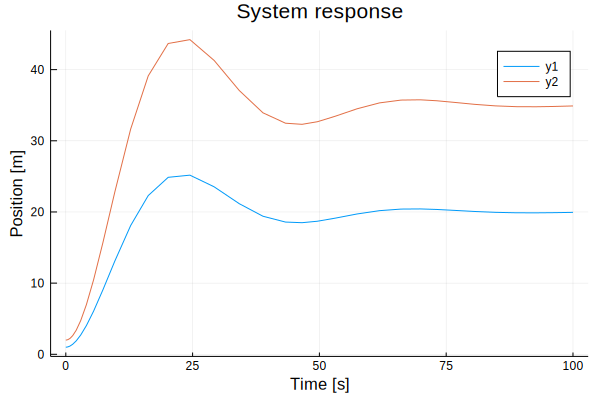

In [21]:
sol = solve(prob); # Solve ODE Problem

y = C * sol; # Calculate system output
plot(sol.t, transpose(y), title="System response", xaxis="Time [s]", yaxis="Position [m]")